# Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed.

Number of Instances: 45211

Number of Attributes: 16 + output attribute

# Attribute information

# Input variables:
    
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
        
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    
   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")
        
   6 - balance: average yearly balance, in euros (numeric)
    
   7 - housing: has housing loan? (binary: "yes","no")
    
   8 - loan: has personal loan? (binary: "yes","no")
    
   # related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
        
  10 - day: last contact day of the month (numeric)
    
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    
  12 - duration: last contact duration, in seconds (numeric)
    
   # other attributes:

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
    
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


# Output variable (desired target):
    
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bank_data = pd.read_csv(r'D:\Rohit\Data Science Class\Thane Dec BAtch\bank-full.csv')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
for col in bank_data.select_dtypes(include = 'object').columns:
    print(col)
    print(bank_data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [7]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank_data.duplicated().sum()

0

# Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.

In [9]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
bank_data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

There are missimg values (unknown) present in dataset.
So, we replace these mossing values with mode with .replace function.

In [12]:
bank_data['job'].mode()

0    blue-collar
Name: job, dtype: object

In [13]:
bank_data['job'] = bank_data['job'].replace('unknown', 'blue-collar', regex = True)

In [14]:
bank_data['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [15]:
bank_data['education'].mode()

0    secondary
Name: education, dtype: object

In [16]:
bank_data['education'] = bank_data['education'].replace('unknown', 'secondary', regex = True)

In [17]:
bank_data['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [18]:
bank_data['contact'].mode()

0    cellular
Name: contact, dtype: object

In [19]:
bank_data['contact'] = bank_data['contact'].replace('unknown', 'cellular', regex = True)

In [20]:
bank_data['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Education type vs Count')

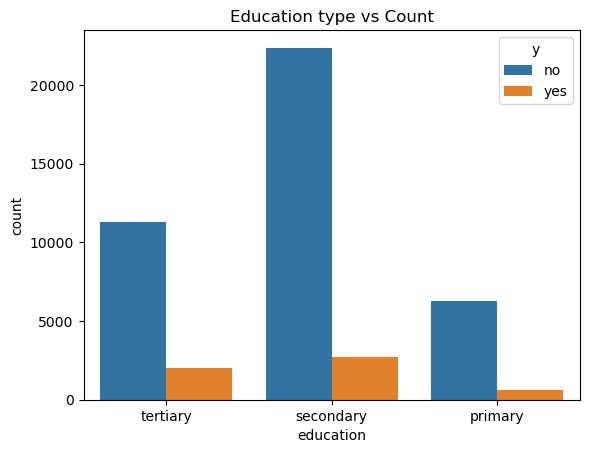

In [21]:
sns.countplot(x="education",data=bank_data, hue = "y")
plt.title("Education type vs Count")

Text(0.5, 1.0, 'Martial Status vs Count')

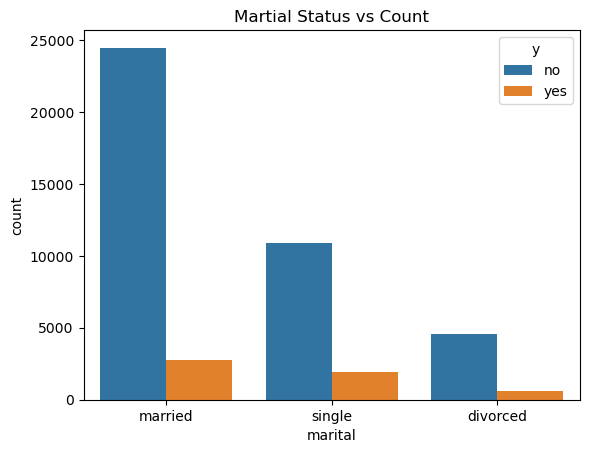

In [22]:
sns.countplot(x="marital", data = bank_data, hue = "y")
plt.title("Martial Status vs Count")

It seems like more number of married people invested in Term deposits

Text(0.5, 1.0, 'job vs Count')

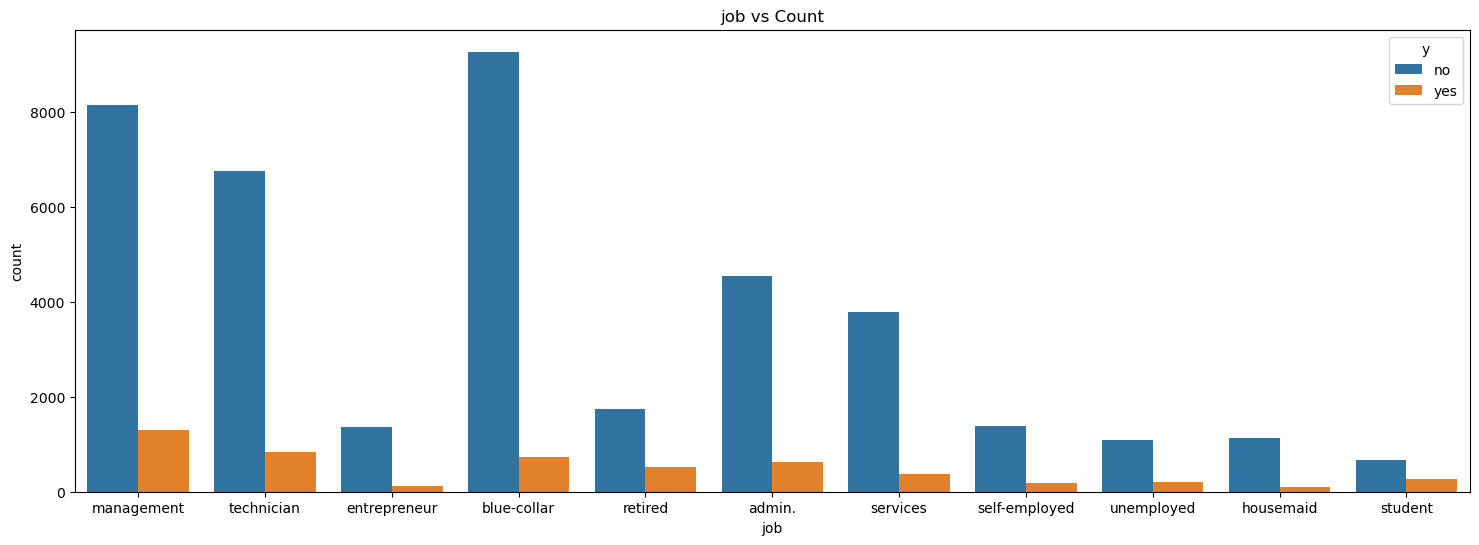

In [23]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x="job", data = bank_data, hue = "y")
plt.title("job vs Count")

It seems like more number of people working in management profiles, technician, blue-collar, admin-job have subscribed to term deposits


Text(0.5, 1.0, 'housing loan vs Count')

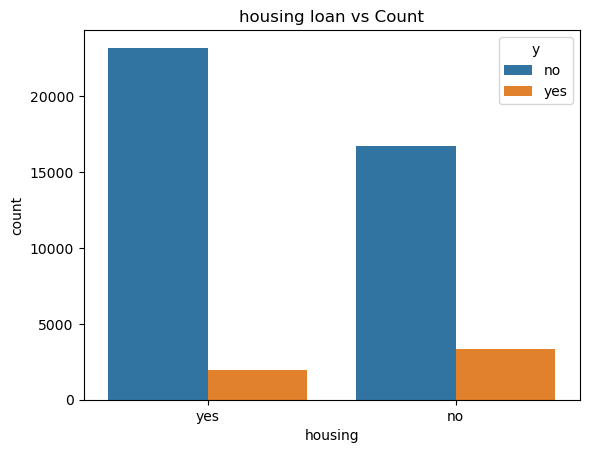

In [24]:
sns.countplot(x="housing", data = bank_data, hue ="y")
plt.title("housing loan vs Count")

In [25]:
default_count = bank_data['default'].value_counts()
default_count

no     44396
yes      815
Name: default, dtype: int64

[Text(0.5, 1.0, 'default column distribution')]

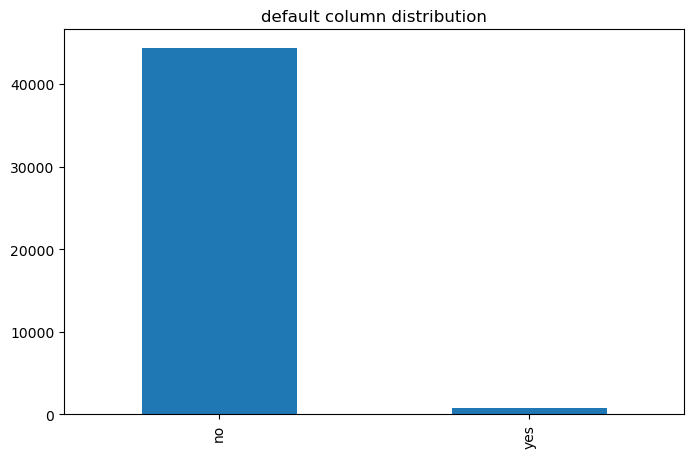

In [26]:
plt.figure(figsize = (8,5))
default_count.plot(kind = 'bar').set(title = 'default column distribution')

In [27]:
loan_count = bank_data['loan'].value_counts()
loan_count

no     37967
yes     7244
Name: loan, dtype: int64

[Text(0.5, 1.0, 'Loan distribution')]

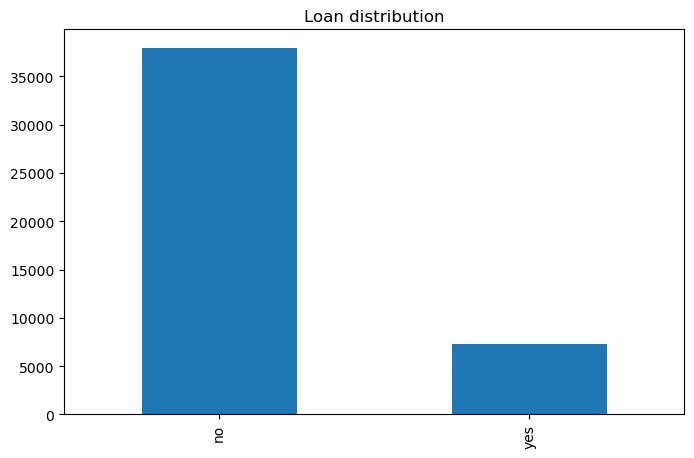

In [28]:
plt.figure(figsize = (8,5))
loan_count.plot(kind = 'bar').set(title = 'Loan distribution')

In [29]:
contact_count = bank_data['contact'].value_counts()
contact_count

cellular     42305
telephone     2906
Name: contact, dtype: int64

[Text(0.5, 1.0, 'contact column distribution')]

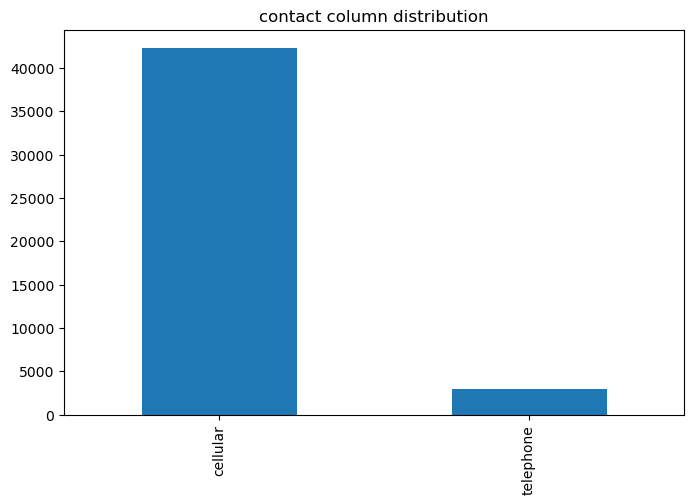

In [30]:
plt.figure(figsize = (8,5))
contact_count.plot(kind = 'bar').set(title = 'contact column distribution')

In [31]:
month_count = bank_data['month'].value_counts()
month_count

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

[Text(0.5, 1.0, 'month data distribution')]

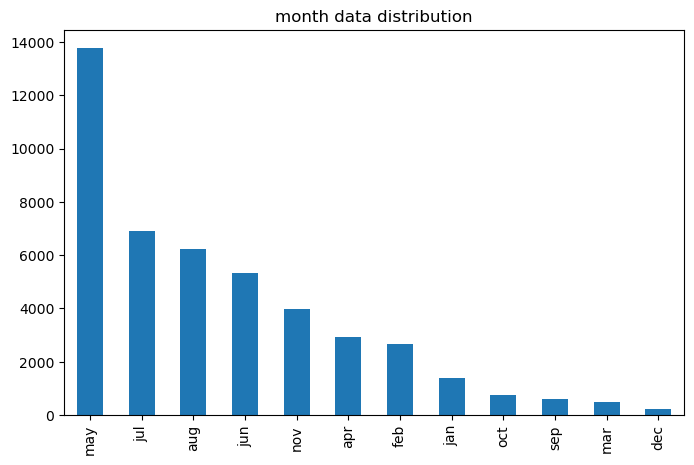

In [32]:
plt.figure(figsize = (8,5))
month_count.plot(kind = 'bar').set(title = "month data distribution")

In [33]:
target_column = bank_data['y'].value_counts()
target_column

no     39922
yes     5289
Name: y, dtype: int64

[Text(0.5, 1.0, 'target column distribution')]

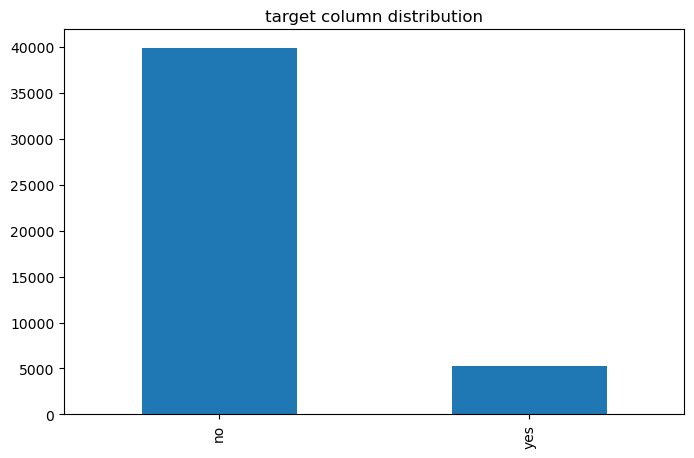

In [34]:
plt.figure(figsize = (8,5))
target_column.plot(kind = 'bar').set(title = 'target column distribution')

Text(0.5, 1.0, 'Client has subscribed a term deposite')

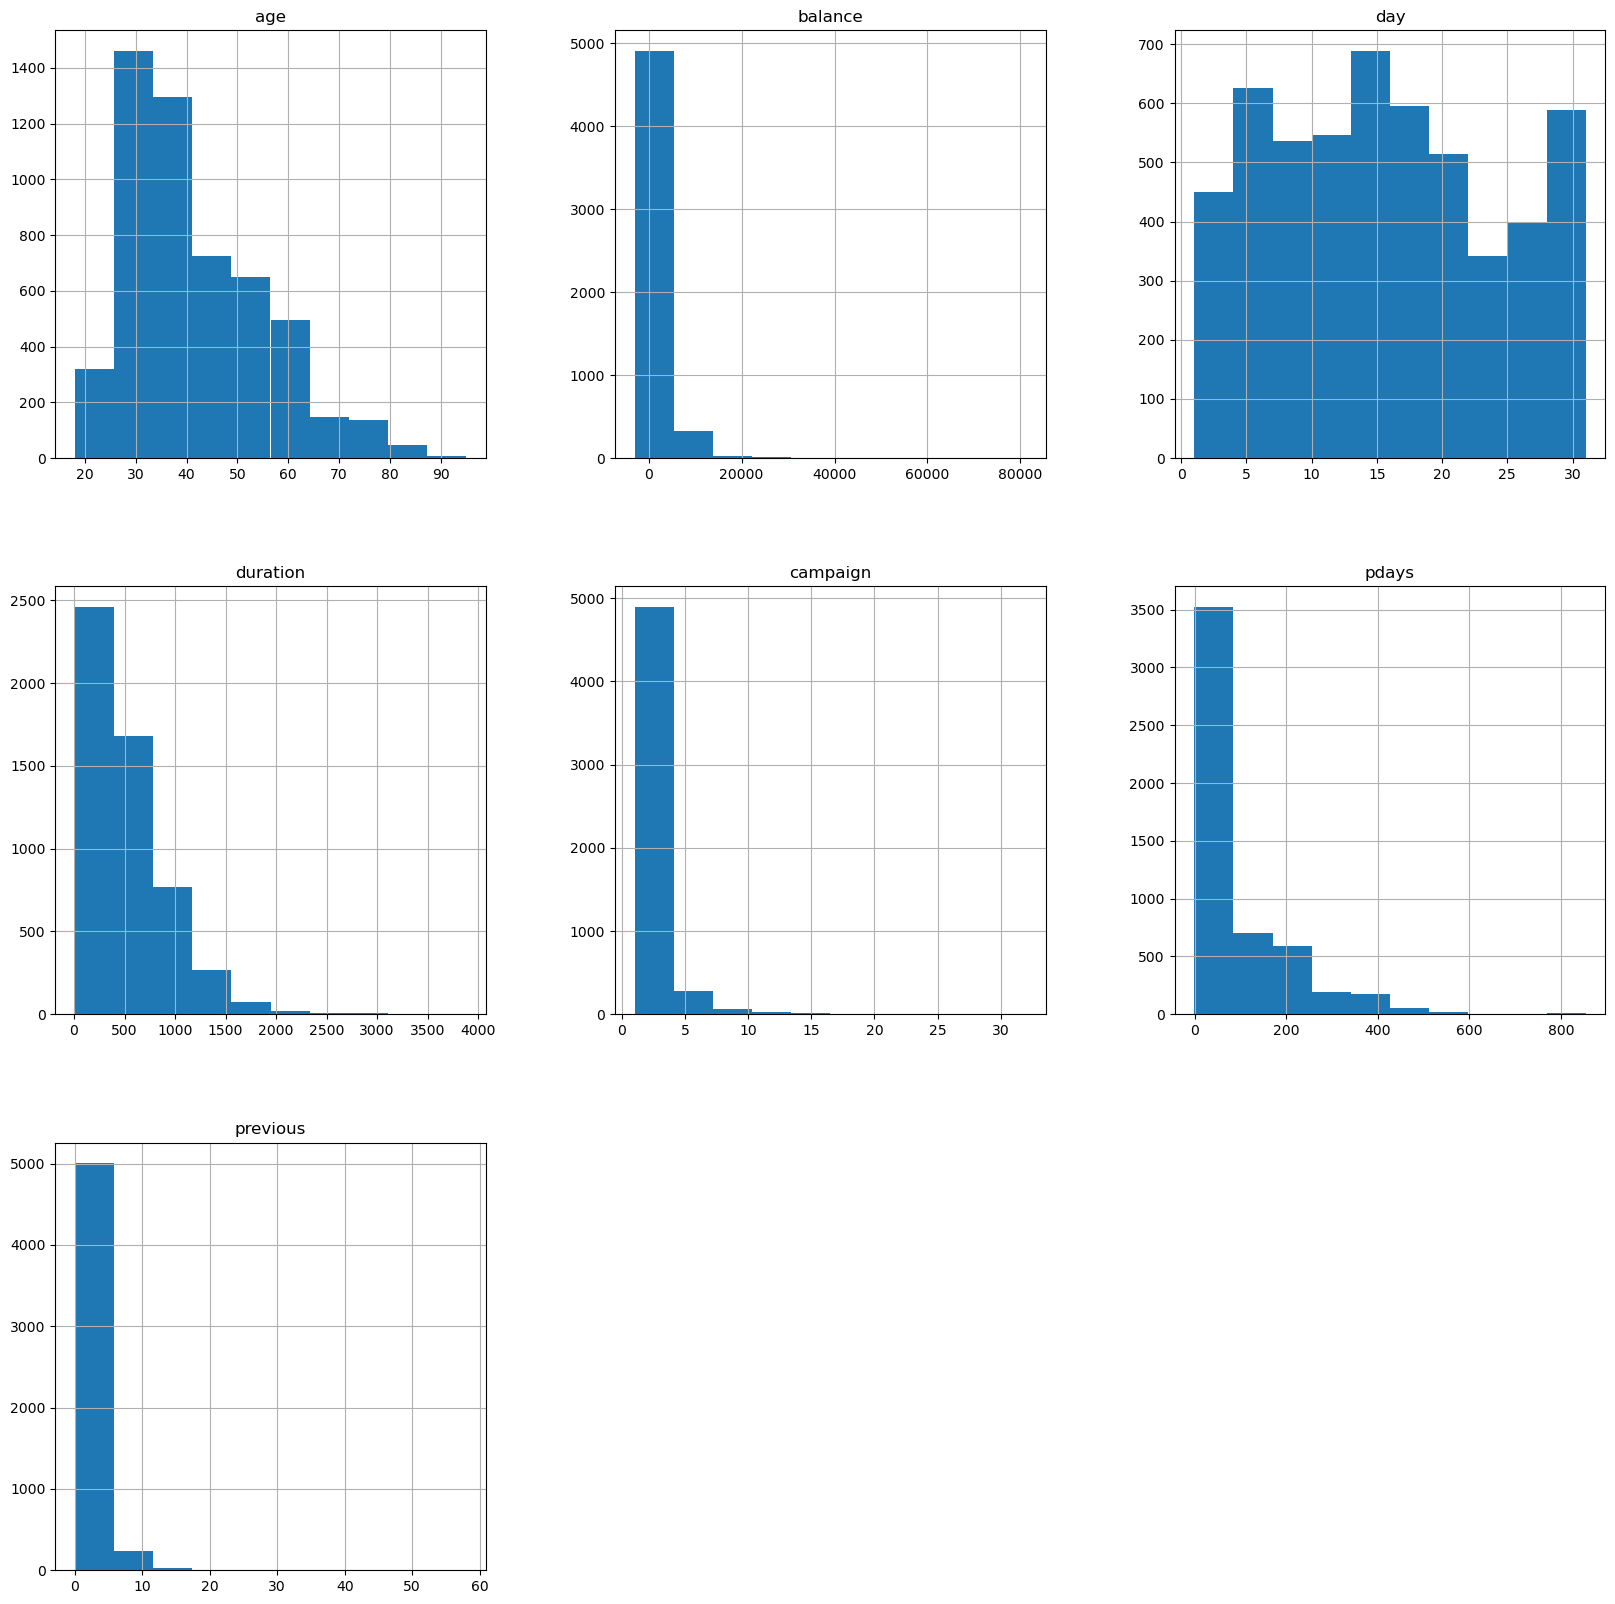

In [35]:
bank_data[bank_data['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')

Text(0.5, 1.0, 'Client has not subscribed a term deposite')

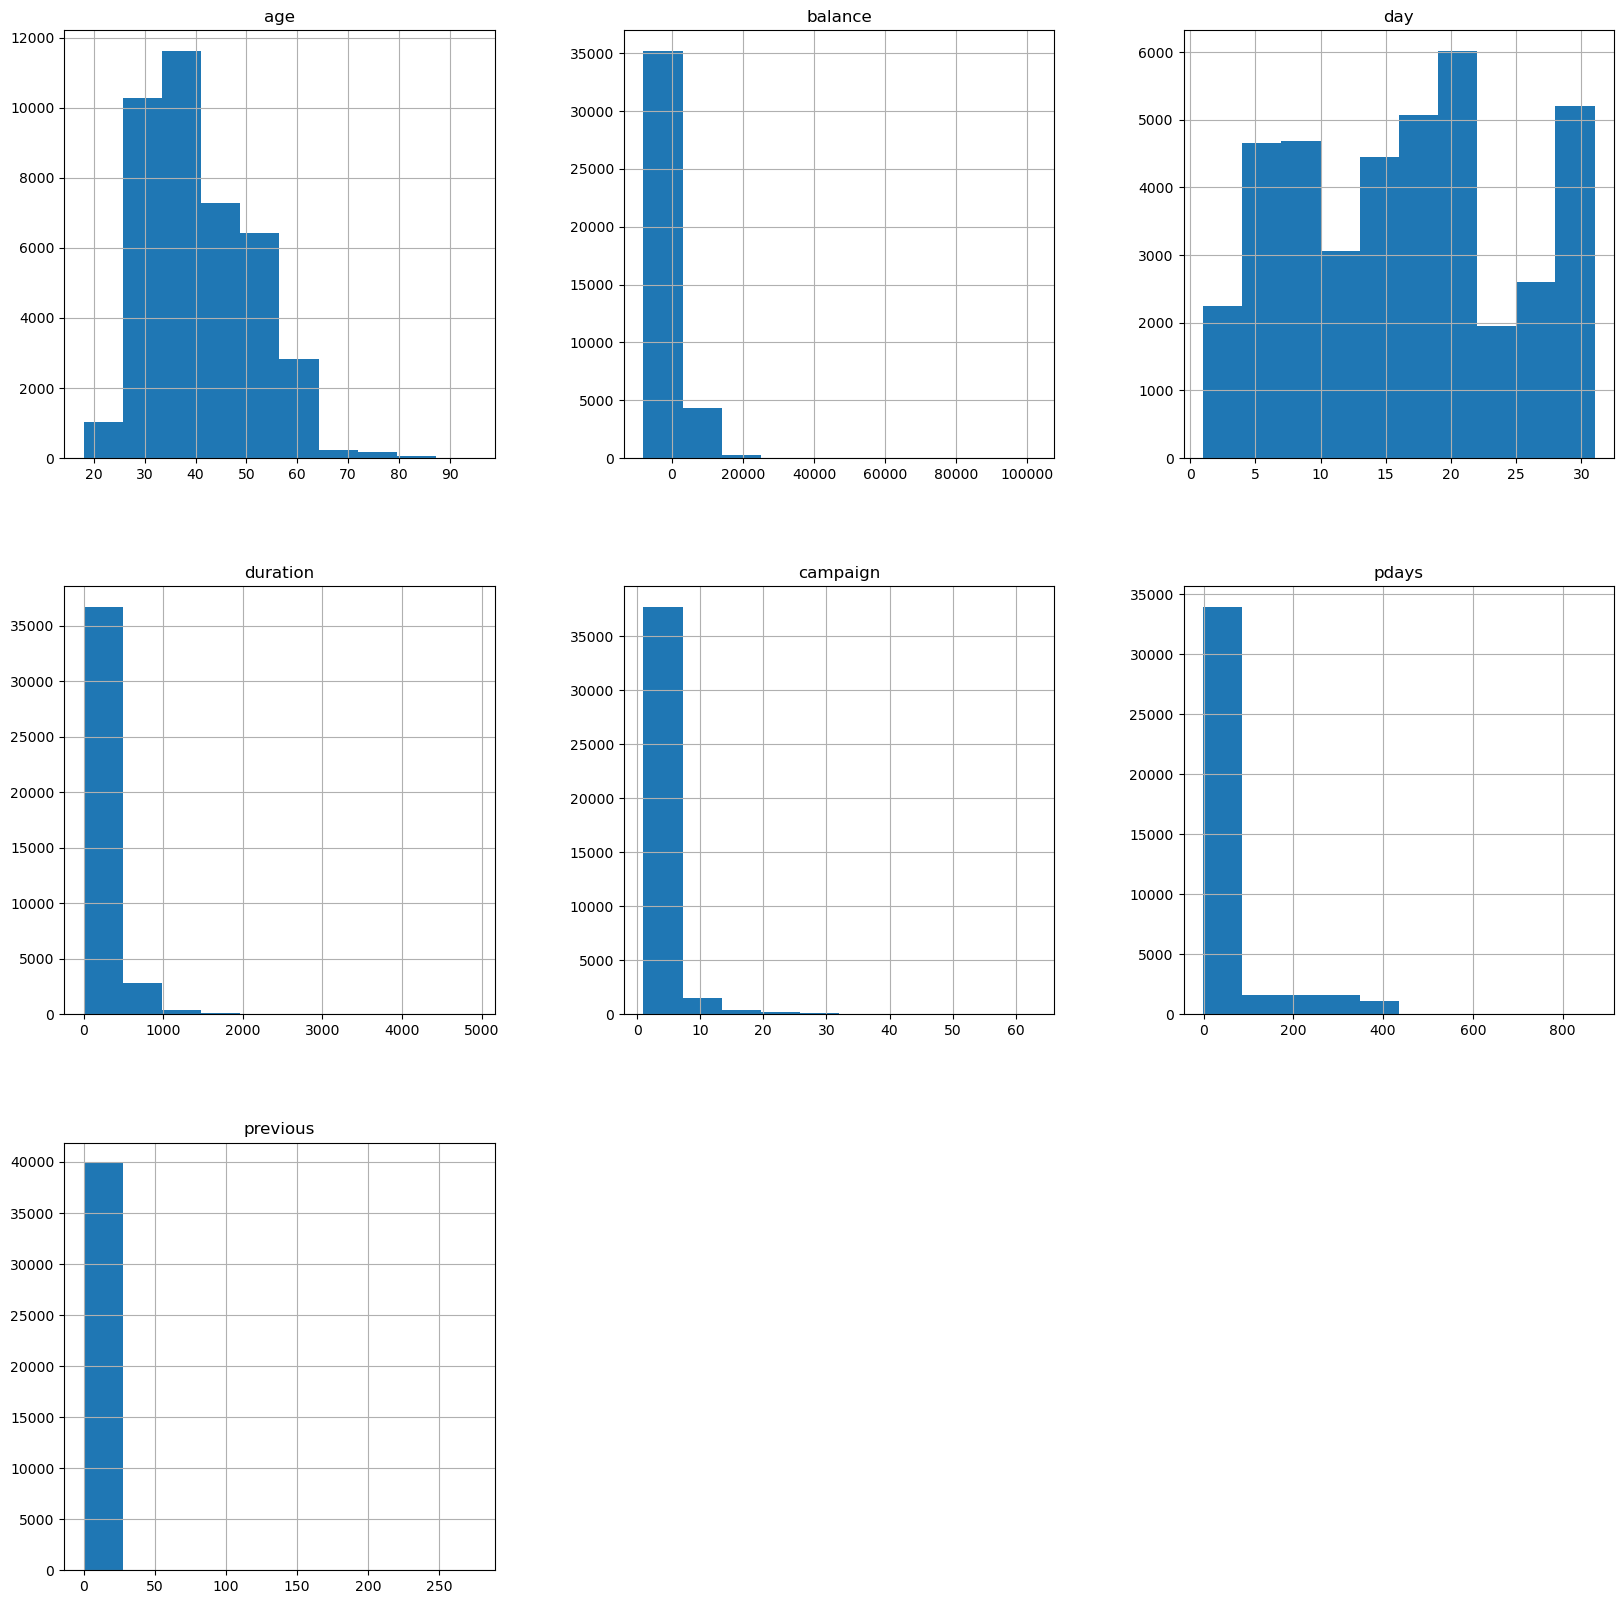

In [36]:
bank_data[bank_data['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')

# Convert default column into numeric value

We can convert the yes values to 1, and the no values to 0 for default column. We will lamda function for tis

In [37]:
bank_data['is default'] = bank_data['default'].apply(lambda row: 1 if row == 'yes' else 0)

In [38]:
bank_data[['default','is default']].head(10)

,default,is default
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,yes,1
8,no,0
9,no,0


# Convert housing column into numeric value

In [39]:
bank_data['is housing'] = bank_data['housing'].apply(lambda row: 1 if row == 'yes' else 0)

In [40]:
bank_data[['housing','is housing']].head(10)

,housing,is housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0
5,yes,1
6,yes,1
7,yes,1
8,yes,1
9,yes,1


# Convert loan column into numeric value

In [41]:
bank_data['is loan'] = bank_data['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [42]:
bank_data[['loan','is loan']]

,loan,is loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0
...,...,...
45206,no,0
45207,no,0
45208,no,0
45209,no,0


# Convert target column ‘y’ into numeric value

In [43]:
bank_data['target'] = bank_data['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [44]:
bank_data[['y','target']]

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
45206,yes,1
45207,yes,1
45208,yes,1
45209,no,0


# Creating one-hot encoding for non-numeric marital column

In [45]:
marital_dummies = pd.get_dummies(bank_data['marital'], prefix = 'marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


Merge marital_dummies with marital column

In [46]:
pd.concat([bank_data['marital'], marital_dummies], axis = 1)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1
...,...,...,...,...
45206,married,0,1,0
45207,divorced,1,0,0
45208,married,0,1,0
45209,married,0,1,0


Remove marital_divorced column

In [47]:
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


# Merge marital_dummies into main dataframe

In [48]:
bank_data = pd.concat([bank_data, marital_dummies], axis = 1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,is default,is housing,is loan,target,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,-1,0,unknown,no,0,1,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,-1,0,unknown,no,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,-1,0,unknown,no,0,1,1,0,1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,-1,0,unknown,no,0,1,0,0,1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,-1,0,unknown,no,0,0,0,0,0,1


# Creating one hot encoding for job column

In [49]:
job_dummies = pd.get_dummies(bank_data['job'], prefix = 'job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


# Merge job_dummies into main dataframe

In [50]:
bank_data = pd.concat([bank_data, job_dummies], axis = 1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,1,0,0,0,0,0,0,0,0,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,1,0,0,0,0,0,0,0,0,0


# Creating one hot encoding for education column

In [51]:
education_dummies = pd.get_dummies(bank_data['education'], prefix = 'education')
education_dummies.tail()

,education_primary,education_secondary,education_tertiary
45206,0,0,1
45207,1,0,0
45208,0,1,0
45209,0,1,0
45210,0,1,0


# Merge education_dummies into main dataframe

In [52]:
bank_data = pd.concat([bank_data, education_dummies], axis = 1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,1,0,0,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0,0,0,0,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,0,0,0,0,0,0,0,0,1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,0,0,0,0,0,0,0,0,1,0


# Creating one hot encoding for contact column

In [53]:
contact_dummies = pd.get_dummies(bank_data['contact'], prefix = 'contact')
contact_dummies.head()

,contact_cellular,contact_telephone
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Merge contact_dummies into main dataframe

In [54]:
bank_data = pd.concat([bank_data, contact_dummies], axis = 1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,0,0,0,0,0,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0,0,0,1,0,0,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0,0,0,0,0,0,1,0,1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,0,0,0,0,0,0,1,0,1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,0,0,0,0,0,0,1,0,1,0


# Creating one hot encoding for poutcome column

In [55]:
poutcome_dummies = pd.get_dummies(bank_data['poutcome'], prefix = 'poutcome')
poutcome_dummies                   

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,1,0
45209,0,0,0,1


# Merge poutcome_dummies into main dataframe

In [56]:
bank_data = pd.concat([bank_data, poutcome_dummies], axis = 1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,0,0,0,1,1,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0,0,1,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0,0,1,0,1,0,0,0,0,1
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,0,0,1,0,1,0,0,0,0,1
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,0,0,1,0,1,0,0,0,0,1


# Convert month column into numeric value

In [57]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
         'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
bank_data['month'] = bank_data['month'].map(months)
bank_data['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

# pdays column

‘pdays’ column indicates the number of days that passed by after the client was last contacted from a previous campaign

In [58]:
bank_data[bank_data['pdays'] == -1]['pdays'].count()

36954

In [59]:
bank_data['was_contacted'] = bank_data['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [60]:
bank_data[['pdays', 'was_contacted']].tail(10)

,pdays,was_contacted
45201,184,1
45202,-1,0
45203,-1,0
45204,40,1
45205,-1,0
45206,-1,0
45207,-1,0
45208,184,1
45209,-1,0
45210,188,1


# Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns

In [61]:
bank_data.drop(['job', 'education', 'marital', 'default', 'housing',
                'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

In [62]:
bank_data.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
is default             int64
is housing             int64
is loan                int64
target                 int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
dtype: object

In [63]:
bank_data.head(10)

,age,balance,day,month,duration,campaign,previous,is default,is housing,is loan,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,was_contacted
0,58,2143,5,5,261,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,44,29,5,5,151,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3,47,1506,5,5,92,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,33,1,5,5,198,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,35,231,5,5,139,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,28,447,5,5,217,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
7,42,2,5,5,380,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
8,58,121,5,5,50,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
9,43,593,5,5,55,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


# Preparing Dataset for model

In [64]:
X = bank_data.drop('target', axis = 1)
y = bank_data['target']

In [65]:
X.shape

(45211, 33)

In [66]:
y.shape

(45211,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [69]:
X_train.shape

(36168, 33)

In [70]:
y_train.shape

(36168,)

In [71]:
X_test.shape

(9043, 33)

In [72]:
y_test.shape

(9043,)

# LOGISTIC REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [74]:
model.fit(X_train,y_train)

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred = model.predict(X_test)

# View accuracy of the model

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)

In [78]:
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 88.73%


# Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
randomforest_clss = RandomForestClassifier()

In [81]:
randomforest_clss.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred = randomforest_clss.predict(X_test)

# View accuracy of the model

In [83]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 90.21%


# BEST MODEL

<BarContainer object of 2 artists>

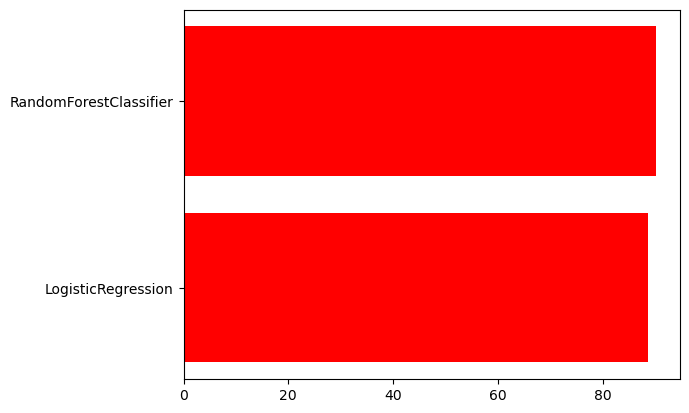

In [84]:
Model=["LogisticRegression","RandomForestClassifier"]
Accuracy=[88.7,90.2]
plt.barh(Model,Accuracy,color="r")

# Hyper parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [86]:
estimator = RandomForestClassifier()

In [87]:
param_grid = {'n_estimators': [100, 150, 200, 250, 300],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_depth': [5, 10, 15, 20,25, 30, 35],
              'max_features': ['auto', 'sqrt', 'log2']}

In [88]:
grid_search = GridSearchCV(estimator, param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_score = grid_search.best_score_

In [ ]:
print("Best Parameters:", best_params)

In [ ]:
print("Best Score:", best_score)

In [ ]:
best_rfc = RandomForestClassifier( criterion ='gini', max_depth = 30, max_features = 'log2',
                                  n_estimators = 250, random_state = 32)

In [ ]:
best_rfc.fit(X_train, y_train)

In [ ]:
y_pred = best_rfc.predict(X_test)

In [ ]:
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))